**Load Dataset**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/PROJECTS/Freelance/TASK 2/Groceries_dataset.csv')

In [ ]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


# **CHECK NULL VALUE**

In [ ]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

# **CHECK DUPLICATES**

In [ ]:
df.duplicated().sum()

759

In [ ]:
df.drop_duplicates()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


# **CHECKING FREQUENCY OF EACH ITEM**

In [ ]:
x=df['itemDescription'].value_counts().sort_values(ascending=False)[:10]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


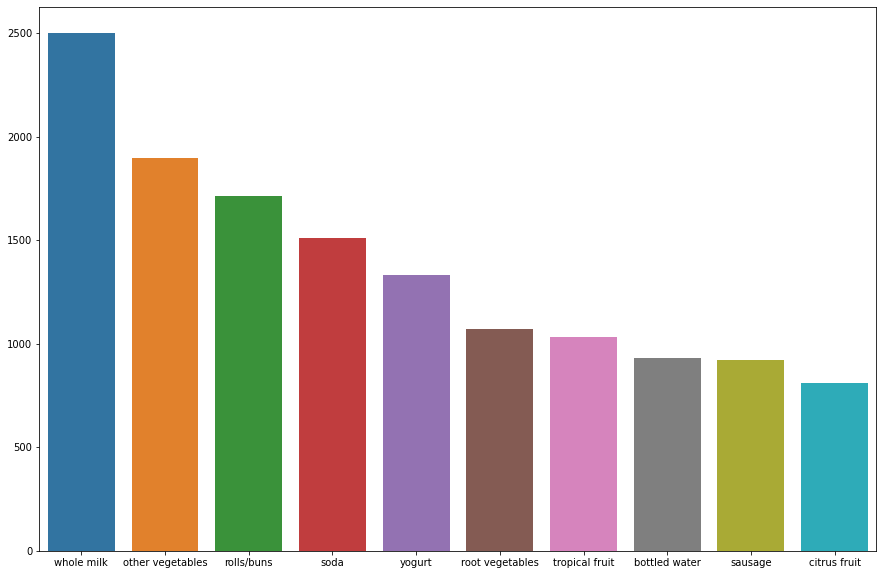

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x.index,x.values)

## **USE MLXTEND FOR DOWNLOADING APRIORI**

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**DRAWING A PIVOT TABLE**

In [ ]:
df['Quantity'] = 1
df

,Member_number,Date,itemDescription,Quantity
0,1808,21-07-2015,tropical fruit,1
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,01-02-2015,whole milk,1
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,1
38761,2022,23-02-2014,candy,1
38762,1097,16-04-2014,cake bar,1
38763,1510,03-12-2014,fruit/vegetable juice,1


In [ ]:
trans=df.groupby(['Member_number'	,'itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')

In [ ]:
tran=trans.fillna(0)

In [ ]:
def encode(x):
  if x<=0:
    return 0
  elif x>=0:
    return 1
trans=tran.applymap(encode)

In [ ]:
trans

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
freq_item=apriori(trans,min_support=0.04,use_colnames=True)
rules=association_rules(freq_item,metric='lift',min_threshold=1)


In [ ]:
from pandas.core.dtypes.dtypes import Ordered
rules=rules[(rules['confidence']>0.4) & (rules['lift']>1)]
rules.sort_values(by=['confidence'] , ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327,"(bottled water, yogurt)",(whole milk),0.066444,0.458184,0.040277,0.606178,1.323001,0.009833,1.375788
435,"(rolls/buns, shopping bags)",(whole milk),0.068753,0.458184,0.041303,0.600746,1.311147,0.009802,1.357073
309,"(bottled water, other vegetables)",(whole milk),0.093894,0.458184,0.056183,0.598361,1.305941,0.013162,1.349012
411,"(yogurt, other vegetables)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507
478,"(sausage, yogurt)",(whole milk),0.075423,0.458184,0.044895,0.595238,1.299125,0.010337,1.338605
...,...,...,...,...,...,...,...,...,...
70,(canned beer),(rolls/buns),0.165213,0.349666,0.066701,0.403727,1.154605,0.008931,1.090663
180,(pastry),(other vegetables),0.177527,0.376603,0.071575,0.403179,1.070567,0.004718,1.044529
315,"(bottled water, whole milk)",(rolls/buns),0.112365,0.349666,0.045151,0.401826,1.149171,0.005861,1.087199
374,"(whole milk, root vegetables)",(other vegetables),0.113135,0.376603,0.045408,0.401361,1.065738,0.002801,1.041356
